# Project 7

## Problem 1:

In [1]:
! pip install --user python-mnist
##installing MNIST

In [2]:
# Importing Numpy and MNIST

import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

/home/campus12/snehan/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# following the instruction from project, import MNIST
from mnist import MNIST
# This loads the dataset from system
data = MNIST()

train_images, train_labels = data.load_training()
test_images, test_labels =  data.load_testing()

#Making the following into arrays:
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)


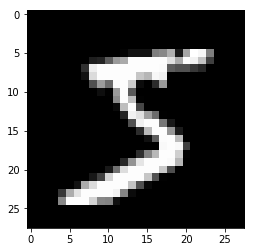

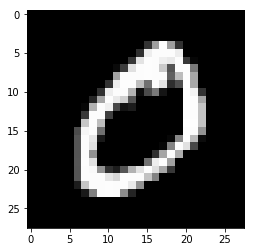

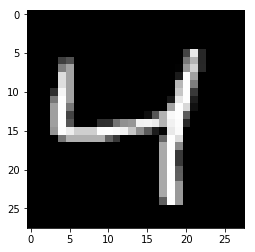

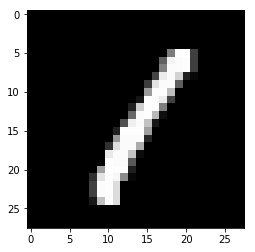

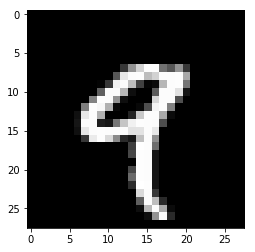

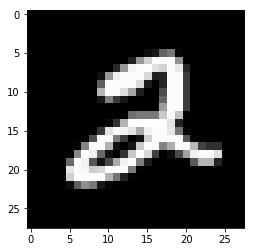

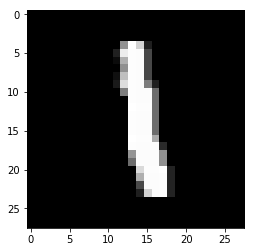

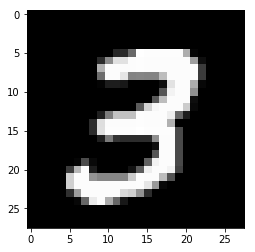

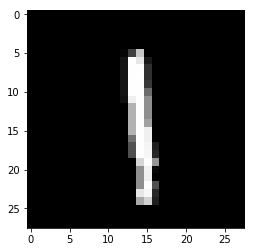

In [4]:
## Reshaping the images 

for i in range(0,9):
    
    image = np.array(train_images[i],dtype='float')
    pixels=image.reshape(28, 28)
    plt.imshow(pixels,cmap='gray')
    plt.show()         


In [5]:
##Importing data set

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
# standardize the dataset
x = StandardScaler().fit_transform(test_images)
X = pd.DataFrame(test_images)
X.head()

/home/campus12/snehan/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
## Importing numpy

import numpy as np
CovMatrix = np.cov(X.T)

In [7]:
##Eigen vals
eigen_val, eigen_vec = np.linalg.eig(CovMatrix)

### Part A
### Estimating the dimensionality of the data. 

In [8]:
###Estimating the dimensionality of the data.

# 40% 
pca1 = PCA(n_components=0.4)
X_reduced = pca1.fit_transform(X)
X_reduced.shape

(10000, 7)

### Part B
### Experimenting with how well the classification behaves with various ranked approximations.One that is smaller than the estimated dimensionality from (a), one that is approximately the estimated dimensionality, and lastly, the full rank approximation (i.e. as if no reduction was performed).

In [9]:
##One that is smaller than the estimated dimensionality 

# 20% 
pca2 = PCA(n_components=0.2)
X_reduced = pca2.fit_transform(X)
X_reduced.shape

(10000, 3)

In [10]:
##one that is approximately the estimated dimensionality
# 50% 
pca3 = PCA(n_components=0.50)
X_reduced = pca3.fit_transform(X)
X_reduced.shape

(10000, 11)

In [11]:
##full rank approximation 

# 99% 
pca4 = PCA(n_components=0.99)
X_reduced = pca4.fit_transform(X)
X_reduced.shape

(10000, 323)

          PC 1        PC 2  class
0  -411.261509 -686.560853      7
1    58.056680  983.209772      2
2  -935.102283  459.059433      1
3  1255.665017 -106.989345      0
4   132.893604 -744.570380      4


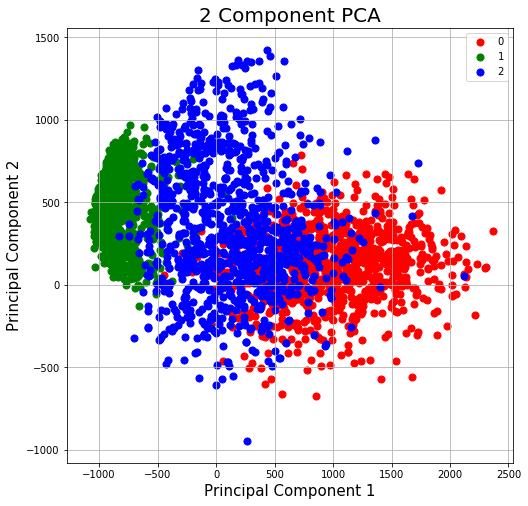

In [12]:
# import PCA here 
from sklearn.decomposition import PCA

# for simplification lets Opt for only 2 components
pca_sci = PCA(n_components=2)

# use fit_transform
PCs = pca_sci.fit_transform(X)


# pca has attribute that gives out the eigen values and its ratio. use dir(pca) to check the list of acceptable attribute
sum(pca_sci.explained_variance_ratio_)

# Transforming all the array and list data into pandas for easy control
PCs_df = pd.DataFrame(data = PCs, columns = ['PC 1', 'PC 2'])
species = pd.DataFrame(test_labels, columns =['class'])
PCs_df = pd.concat([PCs_df, species], axis = 1)
print (PCs_df.head())



# You can use the piece of code for ploting the scatter plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0 , 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = PCs_df['class'] == target
    ax.scatter(PCs_df.loc[indicesToKeep, 'PC 1'], PCs_df.loc[indicesToKeep, 'PC 2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

## Problem 2

### Part A

### DataSet A

In [13]:
import pandas
Adf = pandas.read_csv('data/dataset_a.csv', header=None)

In [14]:
Adf.columns=["Col1","Col2","Class"]
Adf

,Col1,Col2,Class
0,0.040497,0.019591,1
1,0.550300,-0.036563,1
2,0.287870,0.030625,1
3,0.610600,-0.012989,1
4,0.404830,0.010734,1
5,0.299620,-0.015478,1
6,0.452300,-0.016112,1
7,0.342500,-0.021094,1
8,0.408200,0.018894,1
9,0.004282,-0.026712,1


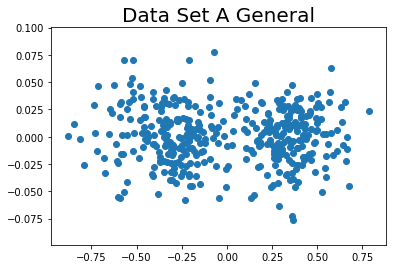

In [15]:
import matplotlib.pyplot as plt
plt.title('Data Set A General', fontsize = 20)

plt.scatter(Adf['Col1'], Adf['Col2'])
plt.show()

targets = [0 , 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = Adf['Class'] == target
    ax.scatter(Adf.loc[Adf['Class'], 'Col1'], Adf.loc[Adf['Class'], 'Col2'], c=color, s = 50)
ax.legend(targets)
ax.grid()


       Col1      Col2  Class  Class
0  0.040497  0.019591      1      1
1  0.550300 -0.036563      1      1
2  0.287870  0.030625      1      1
3  0.610600 -0.012989      1      1
4  0.404830  0.010734      1      1


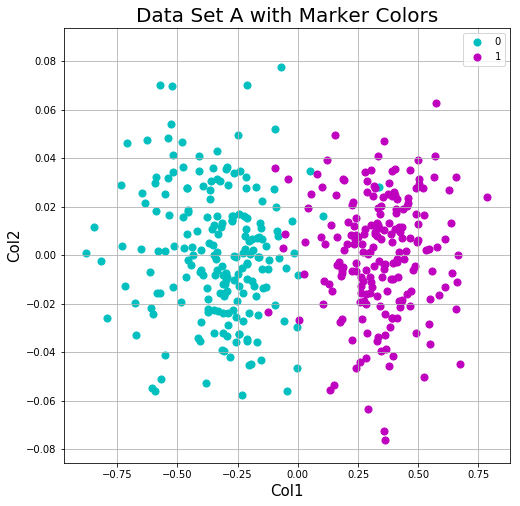

In [16]:
species = pd.DataFrame(Adf['Class'], columns =['Class'])
LDA_df = pd.concat([Adf, species], axis = 1)
print (LDA_df.head())

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Col1', fontsize = 15)
ax.set_ylabel('Col2', fontsize = 15)
ax.set_title('Data Set A with Marker Colors', fontsize = 20)

targets = [0 , 1]
colors = ['c', 'm']
for target, color in zip(targets, colors):
    indicesToKeep = Adf['Class'] == target
    ax.scatter(Adf.loc[indicesToKeep, 'Col1'], Adf.loc[indicesToKeep, 'Col2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

### DataSet B

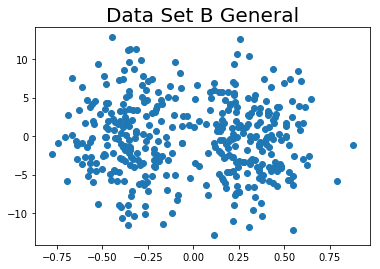

In [17]:
import pandas
Bdf = pandas.read_csv('data/dataset_b.csv')
Bdf.columns=["Col1","Col2","Class"]

import matplotlib.pyplot as plt
plt.title('Data Set B General', fontsize = 20)

plt.scatter(Bdf['Col1'], Bdf['Col2'])
plt.show()

targets = [0 , 1]
colors = ['g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = Bdf['Class'] == target
    ax.scatter(Bdf.loc[Bdf['Class'], 'Col1'], Bdf.loc[Bdf['Class'], 'Col2'], c=color, s = 50)
ax.legend(targets)
ax.grid()


       Col1    Col2  Class  Class
0  0.636230 -2.6004    1.0      1
1  0.366930  1.8192    1.0      1
2  0.458330  3.8111    1.0      1
3  0.067987 -6.3500    1.0      1
4  0.124540  1.5456    1.0      1


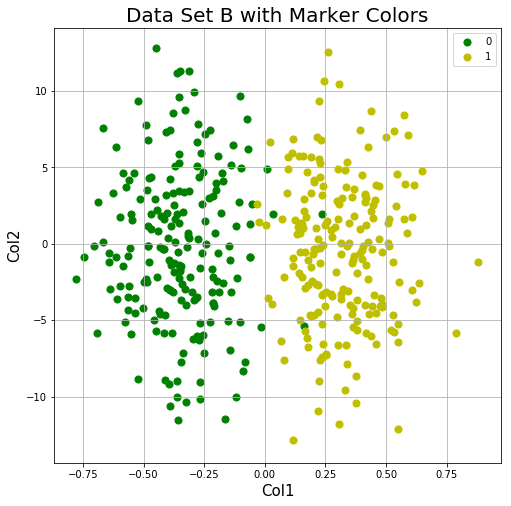

In [18]:
species1 = pd.DataFrame(Bdf['Class'], columns =['Class'])
LDA_df1 = pd.concat([Bdf, species], axis = 1)
print (LDA_df1.head())

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Col1', fontsize = 15)
ax.set_ylabel('Col2', fontsize = 15)
ax.set_title('Data Set B with Marker Colors', fontsize = 20)

targets = [0 , 1]
colors = ['g', 'y']
for target, color in zip(targets, colors):
    indicesToKeep = Bdf['Class'] == target
    ax.scatter(Bdf.loc[indicesToKeep, 'Col1'], Bdf.loc[indicesToKeep, 'Col2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

### Part B

### DataSet A - PCA

In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [20]:
import pandas
Adf = pandas.read_csv('data/dataset_a.csv', header=None)
Adf.columns=["Col1","Col2","Class"]

import pandas
Bdf = pandas.read_csv('data/dataset_b.csv',header=None)
Bdf.columns=["Col1","Col2","Class"]

       Col1      Col2  Class
0 -0.757957  0.777425      1
1 -1.770225 -1.417378      1
2 -1.210861  1.217144      1
3 -1.859742 -0.489308      1
4 -1.450106  0.438149      1


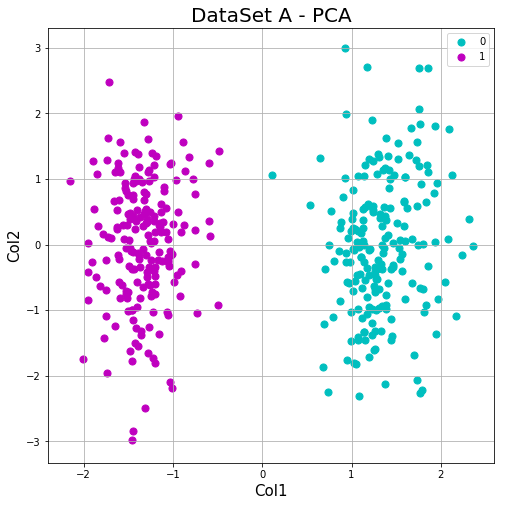

In [21]:
xA = StandardScaler().fit_transform(Adf)

XA = pd.DataFrame(xA)
XA.head()

yA = Adf['Class']

# import PCA here 
from sklearn.decomposition import PCA

# for simplification lets Opt for only 2 components
pca_sci = PCA(n_components=2)

# use fit_transform
PCs = pca_sci.fit_transform(XA)


# pca has attribute that gives out the eigen values and its ratio. use dir(pca) to check the list of acceptable attribute
sum(pca_sci.explained_variance_ratio_)

# Transforming all the array and list data into pandas for easy control
PCs_df = pd.DataFrame(data = PCs, columns = ['Col1', 'Col2'])
species = pd.DataFrame(yA, columns =['Class'])
PCs_df = pd.concat([PCs_df, species], axis = 1)
print (PCs_df.head())

# You can use the piece of code for ploting the scatter plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Col1', fontsize = 15)
ax.set_ylabel('Col2', fontsize = 15)
ax.set_title('DataSet A - PCA', fontsize = 20)

targets = [0 , 1]
colors = ['c', 'm']
for target, color in zip(targets, colors):
    indicesToKeep = PCs_df['Class'] == target
    ax.scatter(PCs_df.loc[indicesToKeep, 'Col1'], PCs_df.loc[indicesToKeep, 'Col2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

In [22]:
print (pca_sci.explained_variance_ratio_)

[0.6293131  0.33318779]


In [23]:
pca1 = PCA(n_components=None)
PCs = pca1.fit_transform(XA)
np.cumsum(pca1.explained_variance_ratio_)

array([0.6293131 , 0.96250089, 1.        ])

### DataSet A - LDA

In [24]:
xA = StandardScaler().fit_transform(Adf)

XA = pd.DataFrame(xA)
XA.head()

yA = Adf['Class']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# from sklearn.lda import LDA
lda = LDA(solver ='svd', n_components = 2)


In [25]:
X_lda = lda.fit_transform(XA,yA)

/home/campus12/snehan/.local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


       Col1      Col2  Class
0  0.040497  0.019591      1
1  0.550300 -0.036563      1
2  0.287870  0.030625      1
3  0.610600 -0.012989      1
4  0.404830  0.010734      1


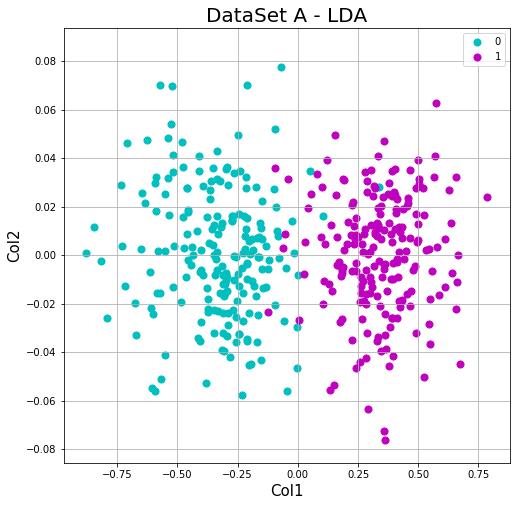

In [26]:
LDA_df = pd.DataFrame(data = Adf, columns = ['Col1', 'Col2'])
species = pd.DataFrame(yA, columns =['Class'])
LDA_df = pd.concat([LDA_df, species], axis = 1)
print (LDA_df.head())

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Col1', fontsize = 15)
ax.set_ylabel('Col2', fontsize = 15)
ax.set_title('DataSet A - LDA', fontsize = 20)

targets = [0 , 1]
colors = ['c', 'm']
for target, color in zip(targets, colors):
    indicesToKeep = LDA_df['Class'] == target
    ax.scatter(LDA_df.loc[indicesToKeep, 'Col1'], LDA_df.loc[indicesToKeep, 'Col2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

In [27]:
lda.explained_variance_ratio_

array([1.])

### DataSet B - PCA

       Col1      Col2  Class
0  0.997089  0.645539      1
1  1.972332 -0.358488      1
2  1.407802  0.527565      1
3  1.557764  0.948245      1
4  0.937048 -1.190122      1


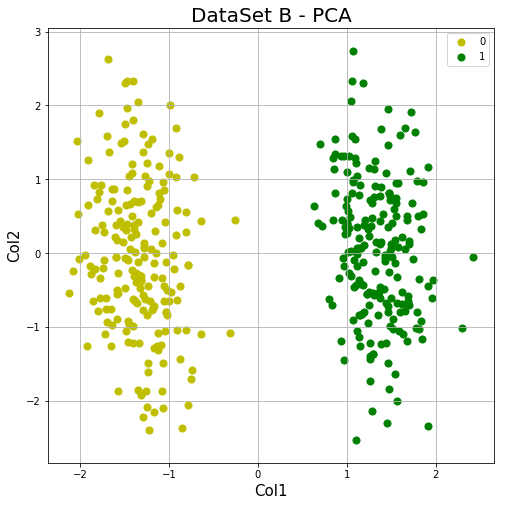

In [28]:
xB = StandardScaler().fit_transform(Bdf)

XB = pd.DataFrame(xB)
XB.head()

yB = Bdf['Class']

# import PCA here 
from sklearn.decomposition import PCA

# for simplification lets Opt for only 2 components
pca_sci = PCA(n_components=2)

# use fit_transform
PCs = pca_sci.fit_transform(XB)


# pca has attribute that gives out the eigen values and its ratio. use dir(pca) to check the list of acceptable attribute
sum(pca_sci.explained_variance_ratio_)

# Transforming all the array and list data into pandas for easy control
PCs_df = pd.DataFrame(data = PCs, columns = ['Col1', 'Col2'])
species = pd.DataFrame(yB, columns =['Class'])
PCs_df = pd.concat([PCs_df, species], axis = 1)
print (PCs_df.head())

# You can use the piece of code for ploting the scatter plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Col1', fontsize = 15)
ax.set_ylabel('Col2', fontsize = 15)
ax.set_title('DataSet B - PCA', fontsize = 20)

targets = [0 , 1]
colors = ['y', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = PCs_df['Class'] == target
    ax.scatter(PCs_df.loc[indicesToKeep, 'Col1'], PCs_df.loc[indicesToKeep, 'Col2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

In [29]:
print (pca_sci.explained_variance_ratio_)
pca1 = PCA(n_components=None)
PCs = pca1.fit_transform(XB)
np.cumsum(pca1.explained_variance_ratio_)

[0.63326484 0.33234141]


array([0.63326484, 0.96560625, 1.        ])

### DataSet B - LDA

       Col1    Col2  Class
0  0.155060  2.4931      1
1  0.636230 -2.6004      1
2  0.366930  1.8192      1
3  0.458330  3.8111      1
4  0.067987 -6.3500      1


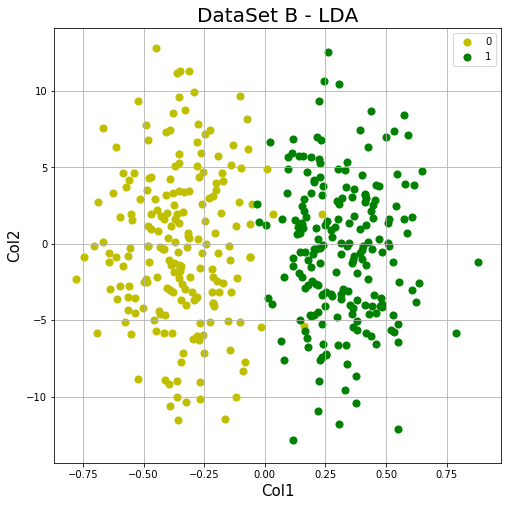

In [30]:
xB = StandardScaler().fit_transform(Bdf)

XB = pd.DataFrame(xB)
XB.head()

yB = Bdf['Class']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# from sklearn.lda import LDA
lda = LDA(solver ='svd', n_components = 2)
X_lda = lda.fit_transform(XB,yB)
LDA_df = pd.DataFrame(data = Bdf, columns = ['Col1', 'Col2'])
species = pd.DataFrame(yB, columns =['Class'])
LDA_df = pd.concat([LDA_df, species], axis = 1)
print (LDA_df.head())

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Col1', fontsize = 15)
ax.set_ylabel('Col2', fontsize = 15)
ax.set_title('DataSet B - LDA', fontsize = 20)

targets = [0 , 1]
colors = ['y', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = LDA_df['Class'] == target
    ax.scatter(LDA_df.loc[indicesToKeep, 'Col1'], LDA_df.loc[indicesToKeep, 'Col2'], c=color, s = 50)
ax.legend(targets)
ax.grid()

### Exaplaination of Result:
### We see that PCA has better result as the values determined are distinguished in a better way than LDA. The values in LDA are mixed and are near to each other while PCA has better difference and is classified properly.
    

## Problem 3

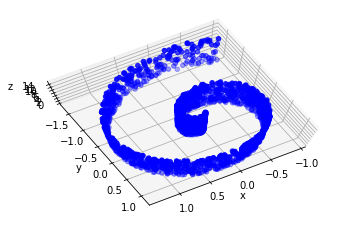

In [31]:
### Creating a Swiss Roll

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline

# set parameters
length_phi = 10   # length of swiss roll in angular direction
length_Z = 15     # length of swiss roll in z direction
sigma = 0.1       # strength of noise
m = 2000          # number of samples

# create dataset
phi = length_phi*np.random.rand(m)
xi = np.random.rand(m)
z = length_Z*np.random.rand(m)
x = 1./6*(phi + sigma*xi)*np.sin(phi)
y = 1./6*(phi + sigma*xi)*np.cos(phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c='b',marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(80,60) # rotate plot 

### Part A - Reading

### Part B - Constructing the similarity graph for this data using Euclidean Distance

[[ 0.          7.38184619  5.65905793 ...  3.79410908  6.94989196
   5.32992717]
 [ 7.38184619  0.          2.07889895 ... 10.67909776  0.44989101
  12.64501382]
 [ 5.65905793  2.07889895  0.         ...  8.71460661  1.75855887
  10.78298431]
 ...
 [ 3.79410908 10.67909776  8.71460661 ...  0.         10.27408747
   2.4495631 ]
 [ 6.94989196  0.44989101  1.75855887 ... 10.27408747  0.
  12.22029791]
 [ 5.32992717 12.64501382 10.78298431 ...  2.4495631  12.22029791
   0.        ]]


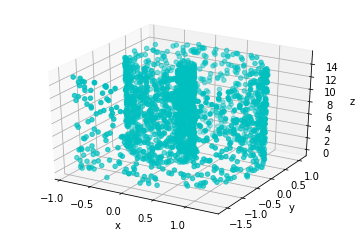

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.spatial.distance import pdist,squareform


DF=pd.DataFrame({'x':x,'y':y,'z':z})
PM=pdist(DF,'euclidean')
AdjM=squareform(PM)
AdjM.shape

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='c',marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
print(AdjM)

### Part C - Compute the graph Laplacian.

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist,squareform
from scipy.spatial import distance_matrix
from scipy.sparse import csgraph
import numpy as np

EDM=pd.DataFrame(1/(1+distance_matrix(DF.T,DF.T)))
EDM

,0,1,2
0,1.000000,0.022345,0.002620
1,0.022345,1.000000,0.002559
2,0.002620,0.002559,1.000000


In [34]:
CovMatrix = csgraph.laplacian(EDM,normed=False)
eigen_val, eigen_vec = np.linalg.eigh(CovMatrix)


### Part D 
### Find the eigenvectors of the graph laplacian, and corresponding eigenvalues. Project data into eigenspace, using the eigenvectors associated with the 2 smallest eigenvalues. Plot what the data looks like in this projected space.

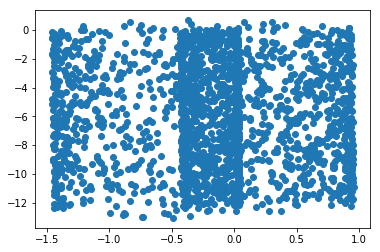

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# constructing a projection matrix
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:,i]) for i in range(len(eigen_val))]
# plt.bar(eigen_pairs)
eigen_pairs.sort(reverse = True)
# print (eigen_pairs
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
# print (w)

PCA_X = pd.DataFrame(DF.dot(w))
PCA_X.columns = ['PC 1', 'PC 2']
plt.scatter(PCA_X['PC 1'],PCA_X['PC 2'])

[-1.23908744e-17  7.76813412e-03  4.72792381e-02]


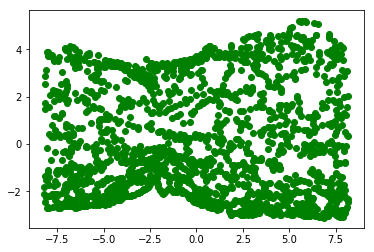

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

print (eigen_val)
Y = manifold.Isomap(6,2).fit_transform(DF)
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

/home/campus12/snehan/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.04183499568659487,
 0.07746587391319079,
 -0.0702297169701329,
 0.07811696409564164)

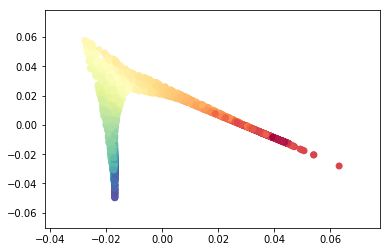

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
n_points = 2000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=10)
n_neighbors = 6
n_components = 2

DF, color = datasets.samples_generator.make_s_curve(n_points, random_state=10)

Y = manifold.LocallyLinearEmbedding(6,2, eigen_solver='auto', method='standard').fit_transform(DF)
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
# plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')